# Twitter Data Wrangling and analysis.

### By: Asma Alreshoud

#### Project brekdown:
in this project I'm going to analyze WeRateDogs Twitter data, the project is going to be done through three phases, which are: Data Gathering, Data assesment ans finally Data Cleaning. Afer that I'm going to store, analyze, and visualize my wrangled data.

# Data Gathering 

#### the data is going to be wrrangled from three different places:
- The WeRateDogs Twitter archive (From: 'twitter_archive_enhanced.csv').
- The tweet image predictions (From: 'image_predictions.tsv').
- Tweet's retweet count and like count (From: 'tweet_json.txt').

#### first lets import The WeRateDogs Twitter archive (From: 'twitter_archive_enhanced.csv').

In [55]:
import pandas as pd

df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### now lets import The tweet image predictions (From: 'image_predictions.tsv').

In [56]:
df2= pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Finally lets import Tweet's retweet count and like count (From: 'tweet_json.txt').

In [122]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 890240255349198849
Fail
2: 889531135344209921
Fail
3: 886366144734445568
Fail
4: 884162670584377345
Fail
5: 883360690899218434
Fail
6: 882762694511734784
Fail
7: 881536004380872706
Fail
8: 878776093423087618
Fail
9: 876838120628539392
Fail
10: 874296783580663808
Fail
11: 874012996292530176
Fail
12: 873337748698140672
Fail
13: 873213775632977920
Fail
14: 871762521631449091
Fail
15: 871515927908634625
Fail
16: 869596645499047938
Fail
17: 867421006826221569
Fail
18: 866816280283807744
Fail
19: 866450705531457537
Fail
20: 851953902622658560
Fail
21: 850019790995546112
Fail
22: 849668094696017920
Fail
23: 846514051647705089
Fail
24: 845397057150107648
Fail
25: 845306882940190720
Fail
26: 837110210464448512
Fail
27: 836753516572119041
Fail
28: 836380477523124226
Fail
29: 833124694597443584
Fail
30: 832998151111966721
Fail
31: 832273440279240704
Fail
32: 832032802820481025
Fail
33: 831939777352105988
Fail
34: 831322785565769729
Fail
35: 829878982036299777
Fail
36: 829374341691346946
Fail
3

In [57]:
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))


In [58]:
df3 = pd.DataFrame()

In [59]:
df3['id']= list(map(lambda tweet: tweet['id'], tweets))
df3['retweet_count']= list(map(lambda tweet: tweet['retweet_count'], tweets))
df3['favorite_count']= list(map(lambda tweet: tweet['favorite_count'], tweets))
df3.head()


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Data Assessing 

in this section I'm going to asses the quality of the all three data sets visually and programaticlly. I'll start with the visual assesment and follow it with the programatic assessment, by using head, tail, info, describe count the duplicate and nulls methods

#### Let's start with df1 which is from WeRateDogs Twitter archive:

- visual:

In [8]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- programatic:

In [9]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


from the head function I noticed that the first 5 enteries of 	'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo',	'floofer', 'pupper' and 'puppo' are all NaNs, I can find the exact ratio of null and have a clearer idea of the data by assesing it programaticlly using null counts. 

In [10]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


same as above, but there is a new problem, which is the name colomn it has some nulls and there is a random letter 'a' in some feilds.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Data types:
- from the fist glance, I noticed that the 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' and 'retweeted_status_user_id' are floats which is unreasonable since id doesn't need to be floats.
- The 'timestamp' and 'retweeted_status_timestamp' are of type object which should be of of type datetime.

In [12]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Let's check if therre is any null values, and what is the ratio

In [13]:
df1.isnull().values.any()

True

In [14]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Let's check the ratio of the missing values and decide what to do with them.

In [15]:
sum(df1['in_reply_to_status_id'].isnull().values)/len(df1['in_reply_to_status_id'])

0.96689303904923596

This can also be applied to 'in_reply_to_user_id', it's a very large ratio, I see that deleting the coloumn is the most suitable solution.

In [16]:
sum(df1['retweeted_status_id'].isnull().values)/len(df1['retweeted_status_id'])

0.92317487266553477

This can also be applied to 'retweeted_status_user_id' and 'retweeted_status_timestamp', it's a very large ratio, I see that deleting the coloumn is the most suitable solution.

In [17]:
sum(df1['expanded_urls'].isnull().values)/len(df1['expanded_urls'])

0.025042444821731749

this is a small ratio, no need to deal with it since it is an optional data

Now let's check on the 'None' values, and see what we can do with them

In [18]:
df1[df1.name == "None"].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

we see that 745 name are None, which hiss ok since it may be an optional value.

In [19]:
df1[df1.doggo== "None"].count()

tweet_id                      2259
in_reply_to_status_id           74
in_reply_to_user_id             74
timestamp                     2259
source                        2259
text                          2259
retweeted_status_id            171
retweeted_status_user_id       171
retweeted_status_timestamp     171
expanded_urls                 2203
rating_numerator              2259
rating_denominator            2259
name                          2259
doggo                         2259
floofer                       2259
pupper                        2259
puppo                         2259
dtype: int64

2259 doggo are Nones.                        

In [20]:
df1[df1.floofer== "None"].count()

tweet_id                      2346
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2346
source                        2346
text                          2346
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2287
rating_numerator              2346
rating_denominator            2346
name                          2346
doggo                         2346
floofer                       2346
pupper                        2346
puppo                         2346
dtype: int64

2346 floofer are none

In [21]:
df1[df1.pupper== "None"].count()

tweet_id                      2099
in_reply_to_status_id           74
in_reply_to_user_id             74
timestamp                     2099
source                        2099
text                          2099
retweeted_status_id            158
retweeted_status_user_id       158
retweeted_status_timestamp     158
expanded_urls                 2042
rating_numerator              2099
rating_denominator            2099
name                          2099
doggo                         2099
floofer                       2099
pupper                        2099
puppo                         2099
dtype: int64

2099 pupper are none

In [22]:
df1[df1.puppo== "None"].count()

tweet_id                      2326
in_reply_to_status_id           77
in_reply_to_user_id             77
timestamp                     2326
source                        2326
text                          2326
retweeted_status_id            176
retweeted_status_user_id       176
retweeted_status_timestamp     176
expanded_urls                 2268
rating_numerator              2326
rating_denominator            2326
name                          2326
doggo                         2326
floofer                       2326
pupper                        2326
puppo                         2326
dtype: int64

2326 puppo are none

The suggested solution is to combine the three columns into one 'type' column that is either doggo or floofer or pupper or puppo.

Let's check number of duplicated

In [23]:
sum(df1.duplicated())

0

Therre is no duplicated data that needs to be removed. Now let's check if there is any tweets archives that are before Aug 1st, 2017

In [24]:
df1[df1.timestamp > "2017-08-01 00:00:00 +0000"].count()

tweet_id                      2
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     2
source                        2
text                          2
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 2
rating_numerator              2
rating_denominator            2
name                          2
doggo                         2
floofer                       2
pupper                        2
puppo                         2
dtype: int64

We should remove these twe tweets to make the data consistent across all dataframe 

#### Now lets move to df2 which is the tweet image predictions:

- visually

In [25]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- programaticlly

In [26]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


I can't visually spot any problem from the above data.

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Data type are well suited.

In [29]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Let's check if there is any nulls in the dataframe

In [30]:
df2.isnull().values.any()

False

Let's check if there is any duplicates in the dataframe

In [31]:
sum(df2.duplicated())

0

#### finally, let's move to the final dataset df3, which is from Tweet's retweet count and like count

In [32]:
df3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
df3.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


nothing unusal from the first sight 

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


All datatypes are well suited

In [35]:
df3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Let's check if there is any nulls in the dataframe

In [36]:
df3.isnull().values.any()

False

Let's check if there is any duplicates in the dataframe

In [37]:
sum(df3.duplicated())

0

Now, Let's conclude the data assessment from the 3 datasets:
## A) Quality issues:
> ####  There is a lot of NaNs that needs to be resolved by dropping it columns in the following:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id           
- retweeted_status_user_id      
- retweeted_status_timestamp
> #### There is a lot of 'Nones' in the many column, which can be replaced with NaNs. 
> #### Data type of in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id     and retweeted_status_user_id should be changed from floats to int since they are ids.
> #### Data types of timestamp and retweeted_status_timestamp should be converted to Datetime
> #### Dates after aug 1st, 2017 should excluded to make sure that the data is consistenet across the three datafarames.
> #### Removing null dogs names.
> #### Removing null types(stages).
> #### keeping the data consistent in the other data frames, by removing the tweets that have been removed from other cleaning operations.
> #### Removing wrong types (stages)

## B) Tidieness:
> #### Doggo or floofer or pupper or puppo should be dropped.
> #### Dog type column should be added  
> #### changing column name of df3 to tweet_id to ease merging

# Data Cleaning 

Let's start with the data tidieness issue, since it requires changing the structure. But before that let's change the 'None' with actual NaN.

In [60]:
def replaceNones (col):
    newCol = []
    for x in df1[col]:
        e = x.replace('None', '')
        newCol.append(e)
    df1[col] =  newCol  
    
    
replaceNones('name')
replaceNones('doggo')
replaceNones('floofer')
replaceNones('pupper')
replaceNones('puppo')

In [61]:
import numpy as np
df1.replace('',np.NaN)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


In [62]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,,,,,
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,,
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,,
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,,,,,


In [63]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
#df1.assign(types=df1[cols].sum(1))
df1 = df1.assign(types=df1[cols].sum(1))
df1['types']

0             
1             
2             
3             
4             
5             
6             
7             
8             
9        doggo
10            
11            
12       puppo
13            
14       puppo
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28            
29      pupper
         ...  
2326          
2327          
2328          
2329          
2330          
2331          
2332          
2333          
2334          
2335          
2336          
2337          
2338          
2339          
2340          
2341          
2342          
2343          
2344          
2345          
2346          
2347          
2348          
2349          
2350          
2351          
2352          
2353          
2354          
2355          
Name: types, Length: 2356, dtype: object

Now let's start dropping 'doggo', 'floofer', 'pupper' and 'puppo', since we got their values saved in types

In [64]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df1= df1.drop(cols, axis=1)

Now, let's move to dropping (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) 

In [65]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df1= df1.drop(cols, axis=1)

In [66]:
df1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


Now, let's change the data types, and since most of the corrupted data types columns have been drropped we only have to fix the timedtamp datatype from string to datetime:

In [67]:
import datetime

dates= []
for x in df1['timestamp']:
    e = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z')
    dates.append(x)

df1['timestamp'] = dates

finally, let's remove all the data after Aug 1, 2017, no insure data consistincy.

In [76]:
df1 = df1[df1.timestamp <= "2017-08-01 00:00:00 +0000"]

deleting null or rubish dog names 

In [77]:
df1 = df1[df1.name != '']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 2 to 2354
Data columns (total 9 columns):
tweet_id              1609 non-null int64
timestamp             1609 non-null object
source                1609 non-null object
text                  1609 non-null object
expanded_urls         1609 non-null object
rating_numerator      1609 non-null int64
rating_denominator    1609 non-null int64
name                  1609 non-null object
types                 1609 non-null object
dtypes: int64(3), object(6)
memory usage: 125.7+ KB


In [78]:
df1 = df1[df1.types != '']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 9 to 2017
Data columns (total 9 columns):
tweet_id              220 non-null int64
timestamp             220 non-null object
source                220 non-null object
text                  220 non-null object
expanded_urls         220 non-null object
rating_numerator      220 non-null int64
rating_denominator    220 non-null int64
name                  220 non-null object
types                 220 non-null object
dtypes: int64(3), object(6)
memory usage: 17.2+ KB


In [111]:
df1 = df1[df1.types != 'doggopupper']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 9 to 2017
Data columns (total 9 columns):
tweet_id              214 non-null int64
timestamp             214 non-null object
source                214 non-null object
text                  214 non-null object
expanded_urls         214 non-null object
rating_numerator      214 non-null int64
rating_denominator    214 non-null int64
name                  214 non-null object
types                 214 non-null object
dtypes: int64(3), object(6)
memory usage: 16.7+ KB


Although that a lot of the data is now removed, but now all the remaining data is absoultly clean and can be analyzed easliy, since the project is about wrangling and resulting in clean data.

Now let's change the name of 'id' column to 'tweet_id'

In [83]:
df3.columns = ['tweet_id','retweet_count','favorite_count']
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Storing

In [112]:
#finaldf = pd.concat([df1, df2, df3], axis=1, join='inner', join_axes= 'tweet_id').sort_index()
#finaldf
from functools import reduce
dfs = [df1, df2, df3]
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
df_final


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2321,15359
2,886366144734445568,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,3316,21524
3,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
4,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,3825,22986
5,882762694511734784,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,...,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,5134,28903
6,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper,https://pbs.twimg.com/ext_tw_video_thumb/88153...,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570,50199
7,878776093423087618,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,...,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True,4319,19763
8,876838120628539392,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,pupper,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,...,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,3506,21125
9,874296783580663808,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,pupper,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,...,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True,4308,26651


Finally saving the final dataframe into 'twitter_archive_master' csv file :)

In [113]:
df_final.to_csv('twitter_archive_master.csv')

In [114]:
tw_df = pd.read_csv('twitter_archive_master.csv')
tw_df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,1,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2321,15359
2,2,886366144734445568,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,3316,21524
3,3,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
4,4,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,3825,22986


# Analyzing the data

In [115]:
tw_df.groupby(['types']).mean()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
types,,,,,,,,,,,,,
doggo,46.976190,8.099550e+17,12.190476,10.0,1.309524,0.619302,0.761905,0.151971,0.785714,0.054784,0.642857,7056.714286,16985.166667
floofer,78.400000,7.704392e+17,11.600000,10.0,1.200000,0.584707,1.000000,0.140088,1.000000,0.057665,0.800000,2247.200000,9559.000000
pupper,116.976562,7.243678e+17,10.460938,10.0,1.273438,0.610786,0.718750,0.126774,0.718750,0.054257,0.687500,2324.421875,7369.148438
puppo,50.437500,8.079588e+17,11.812500,10.0,1.500000,0.719815,0.875000,0.169618,0.937500,0.047508,1.000000,3472.250000,11739.125000


#### first insight is to see how the dog stage effects the rating, retweet count and favorite count

on avarage, doggo get the highest rating numerator, retweet count and favorite. Poeple seem to enjoy doggo stage ;)

#### second insight is to see which dog stage is easier to predict and how many pictures are ofen posted of them

floofer is easier and more accurate to predict this could be duo to the fur aspect

In [116]:
tw_df.groupby(['rating_numerator']).mean()

,Unnamed: 0,tweet_id,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
rating_numerator,,,,,,,,,,,,
3,129.000000,6.935908e+17,10.0,1.000000,0.383448,0.000000,0.103191,0.000000,0.098256,0.000000,2233.000000,5565.000000
6,185.000000,6.726147e+17,10.0,1.000000,0.712717,0.000000,0.258865,0.000000,0.002015,0.000000,644.000000,1302.000000
7,154.166667,6.826572e+17,10.0,1.000000,0.400893,0.333333,0.146867,0.333333,0.085637,0.000000,1467.666667,4497.333333
8,140.090909,7.025612e+17,10.0,1.000000,0.524927,0.363636,0.143674,0.454545,0.049855,0.272727,1622.090909,4371.000000
9,134.428571,7.007303e+17,10.0,1.142857,0.645410,0.714286,0.128838,0.785714,0.063056,0.857143,912.785714,2857.785714
10,136.153846,6.975097e+17,10.0,1.051282,0.608209,0.769231,0.132759,0.717949,0.057181,0.794872,1046.307692,3122.846154
11,104.688889,7.343097e+17,10.0,1.400000,0.634251,0.733333,0.110180,0.777778,0.045985,0.666667,2453.600000,6770.733333
12,56.390244,8.019720e+17,10.0,1.341463,0.604997,0.853659,0.168521,0.902439,0.057282,0.756098,3491.292683,13260.634146
13,30.000000,8.369008e+17,10.0,1.473684,0.766472,1.000000,0.124141,1.000000,0.050185,1.000000,6737.052632,23624.526316


#### third insight is that there is no direct relationship between the rating numerator and the amount of retweet count	and favorite count, but on avarage dogs with rating (14) have the most retweets and favorites. 

#### An extra insight is that dogs that are correctly predicted have higher rating. 

# visualization

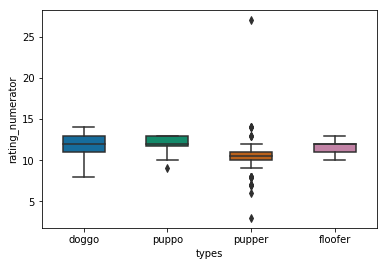

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

bplot = sns.boxplot(x='types', y='rating_numerator', 
                 data=tw_df, 
                 width=0.5,
                 palette="colorblind")

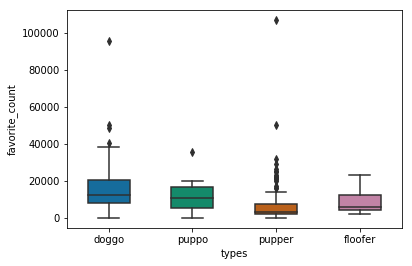

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

bplot = sns.boxplot(x='types', y='favorite_count', 
                 data=tw_df, 
                 width=0.5,
                 palette="colorblind")

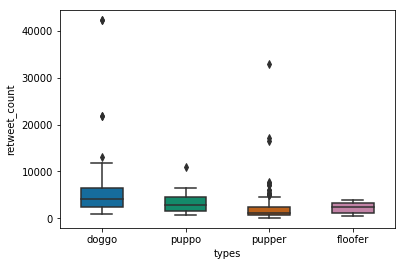

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

bplot = sns.boxplot(x='types', y='retweet_count', 
                 data=tw_df, 
                 width=0.5,
                 palette="colorblind")

# References 

- https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe

- https://stackoverflow.com/questions/41631873/how-to-read-json-txt-and-parse-json-python-read-txt-python

- https://stackoverflow.com/questions/40777810/python-map-a-lambda-function-to-a-list

- https://stackoverflow.com/questions/46563833/how-to-merge-combine-columns-in-pandas

- https://www.saltycrane.com/blog/2009/05/converting-time-zones-datetime-objects-python/

- https://cmdlinetips.com/2018/03/how-to-filter-a-pandas-dataframe-based-on-null-values-of-a-column/

- https://stackoverflow.com/questions/48051100/python-pandas-merge-multiple-csv-files

- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

- http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/